In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline


import os
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'E:/py_pandasDA_practice/code/datasets/bitly_usagov/example.txt'

In [4]:
import json
records = [json.loads(line) for line in open(path)]

In [5]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

1. 纯Python时区计数

In [7]:
# 最常出现的时区（tz）

time_zones = [rec['tz'] for rec in records]


KeyError: 'tz'

In [9]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [10]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [11]:
# 方法一遍历时区时利用字典来存储计数

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [12]:
# 方法二使用python中的标准库中的高级工具：

from collections import defaultdict

In [13]:
def get_counts2(sequence):
    counts = defaultdict(int) #值会初始化为0
    for x in sequence:
        counts[x] += 1
    return counts

In [15]:
counts = defaultdict(int)
type(counts)

collections.defaultdict

In [19]:
counts = get_counts(time_zones)
counts['America/New_York']
counts

{'': 521,
 'Africa/Cairo': 3,
 'Africa/Casablanca': 1,
 'Africa/Ceuta': 2,
 'Africa/Johannesburg': 1,
 'Africa/Lusaka': 1,
 'America/Anchorage': 5,
 'America/Argentina/Buenos_Aires': 1,
 'America/Argentina/Cordoba': 1,
 'America/Argentina/Mendoza': 1,
 'America/Bogota': 3,
 'America/Caracas': 1,
 'America/Chicago': 400,
 'America/Chihuahua': 2,
 'America/Costa_Rica': 1,
 'America/Denver': 191,
 'America/Edmonton': 6,
 'America/Guayaquil': 2,
 'America/Halifax': 4,
 'America/Indianapolis': 20,
 'America/La_Paz': 1,
 'America/Lima': 1,
 'America/Los_Angeles': 382,
 'America/Managua': 3,
 'America/Mazatlan': 1,
 'America/Mexico_City': 15,
 'America/Monterrey': 1,
 'America/Montevideo': 1,
 'America/Montreal': 9,
 'America/New_York': 1251,
 'America/Phoenix': 20,
 'America/Puerto_Rico': 10,
 'America/Rainy_River': 25,
 'America/Recife': 2,
 'America/Santo_Domingo': 1,
 'America/Sao_Paulo': 33,
 'America/St_Kitts': 1,
 'America/Tegucigalpa': 1,
 'America/Vancouver': 12,
 'America/Winnipeg':

In [17]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [31]:
# a, b = list(counts.items())[1]

In [34]:
# a, b #第一个元素是时区，第二个元素为计数

('Australia/NSW', 6)

In [35]:
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

2. 使用pandas进行时区计数

In [36]:
frame = pd.DataFrame(records)
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
_heartbeat_    120 non-null float64
a              3440 non-null object
al             3094 non-null object
c              2919 non-null object
cy             2919 non-null object
g              3440 non-null object
gr             2919 non-null object
h              3440 non-null object
hc             3440 non-null float64
hh             3440 non-null object
kw             93 non-null object
l              3440 non-null object
ll             2919 non-null object
nk             3440 non-null float64
r              3440 non-null object
t              3440 non-null float64
tz             3440 non-null object
u              3440 non-null object
dtypes: float64(4), object(14)
memory usage: 500.7+ KB


In [37]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [38]:
tz_counts = frame['tz'].value_counts()

In [39]:
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [40]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'

In [41]:
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

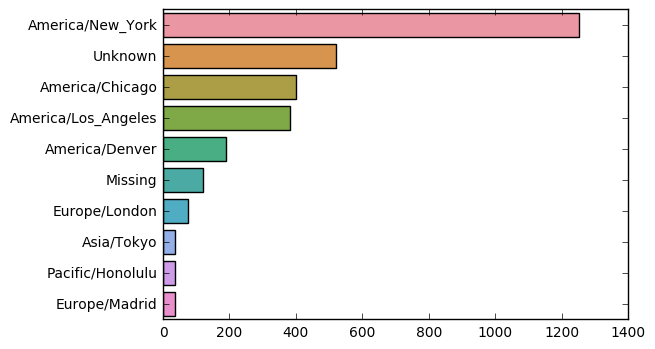

In [42]:
subset = tz_counts[:10]
sns.barplot(y=subset.index, x=subset.values)

In [43]:
# a列包含了执行网址缩短的浏览器、设备或应用的信息；

frame['a'][1]

'GoogleMaps/RochesterNY'

In [44]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [46]:
frame['a'][51][:50] #代理信息

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [48]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

In [49]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [50]:
cframe = frame[frame.a.notnull()]

# 计算每一个代表每一行是否是Windows值

cframe['os'] = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')

cframe['os'][:5]

C:\Program Files\Python35\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0        Windows
1    Not Windows
2        Windows
3    Not Windows
4        Windows
Name: os, dtype: object

In [51]:
by_tz_os = cframe.groupby(['tz', 'os'])

In [79]:
# 与value_counts函数类似，分组计数可以使用size计算

agg_counts = by_tz_os.size().unstack().fillna(0)

# unstack后tz为行，os为列

In [68]:
agg_counts[:10]

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [69]:
# 最后为了选出总体计数最高的时区，在agg_counts中根据行的计数够早了一个间接索引数组。

In [71]:
# 用于升序排列.argsort()，使用列数据对df进行重排

indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [73]:
#使用take方法按照顺序选出行，之后再对最后10行进行切片（最大的十个值）

count_subset = agg_counts.take(indexer[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


pandas中有个便捷的方法叫做nlargest，可以做相同的事情

In [74]:
agg_counts.sum(1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [76]:
agg_counts.sum(1).head()

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
dtype: float64

In [80]:
# 对绘图数据进行重新排列

count_subset = count_subset.stack()
count_subset[:10]

tz                 os         
America/Sao_Paulo  Not Windows    13.0
                   Windows        20.0
Europe/Madrid      Not Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Not Windows     0.0
                   Windows        36.0
Asia/Tokyo         Not Windows     2.0
                   Windows        35.0
Europe/London      Not Windows    43.0
                   Windows        31.0
dtype: float64

In [81]:
count_subset.name='total'
count_subset.head()

tz                 os         
America/Sao_Paulo  Not Windows    13.0
                   Windows        20.0
Europe/Madrid      Not Windows    16.0
                   Windows        19.0
Pacific/Honolulu   Not Windows     0.0
Name: total, dtype: float64

In [83]:
count_subset.index

MultiIndex(levels=[['America/Sao_Paulo', 'Europe/Madrid', 'Pacific/Honolulu', 'Asia/Tokyo', 'Europe/London', 'America/Denver', 'America/Los_Angeles', 'America/Chicago', '', 'America/New_York'], ['Not Windows', 'Windows']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['tz', 'os'])

In [84]:
count_subset = count_subset.reset_index()
count_subset[:10]

,tz,os,total
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Not Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Not Windows,43.0
9,Europe/London,Windows,31.0


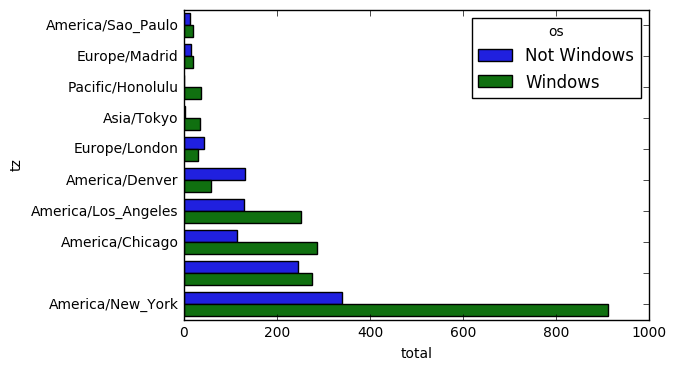

In [85]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)

In [87]:
# 将组百分比归一化为1

def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

result = count_subset.groupby('tz').apply(norm_total)

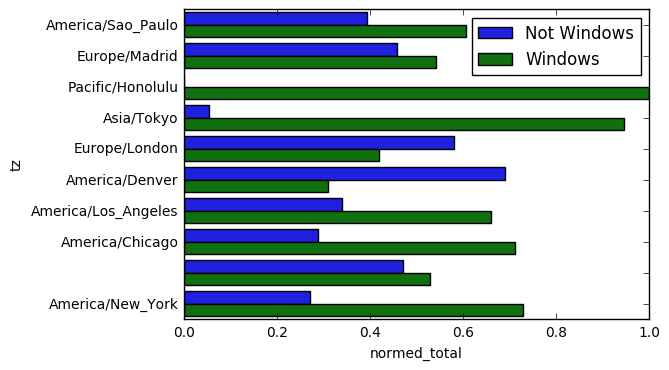

In [92]:
sns.barplot(x='normed_total', y='tz', hue='os', data=result)
plt.legend(loc='best')

# windows与非w用户最高计数时区百分比

In [98]:
#利用groupby更高效地计算归一化值

g = count_subset.groupby('tz')
results2 = count_subset.total / g.total.transform('sum')

In [99]:
results2.head()

0    0.393939
1    0.606061
2    0.457143
3    0.542857
4    0.000000
Name: total, dtype: float64